In [82]:
from scipy.optimize import brentq
from BNumMet.NonLinear import zBrentDekker
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn as sns

sns.set_theme(
    style="white",
)

# 0. Experiment Function
For the following examples, we will use the following function that outputs a plot comparing the number of iterations required to reach a certain accuracy for different methods.

In [83]:
getIterations = lambda x,: x[
    1
]  # This returns the number of iterations we have increased by
getIntervalWidth = lambda x: x[
    0
]  # This returns the interval width we have increased by
getValue = lambda x: x[2]  # This is the value of the function at the root (should be 0)


def experimentPlot(df, order, length_tuple, noMatlab=False, number=1):
    df = df.loc[order]  # Get the order we want
    intervalWidth = list(map(getIntervalWidth, df["Scipy"]))[
        length_tuple[0] : length_tuple[1]
    ]  # Get the interval width

    # 1. Clustered Column Chart with iterations
    df_iterations = pd.DataFrame(  # Create a new dataframe with the iterations
        {
            "Scipy": list(map(getIterations, df["Scipy"]))[
                length_tuple[0] : length_tuple[1]
            ],
            "BNM": list(map(getIterations, df["BNM"]))[
                length_tuple[0] : length_tuple[1]
            ],
            "Matlab": list(map(getIterations, df["Matlab"]))[
                length_tuple[0] : length_tuple[1]
            ],
        },
        index=intervalWidth,
    )

    # 2. Clustered Column Chart with relative error
    relative_error_func = lambda relVal: lambda x: abs(x[2] - relVal) / abs(relVal)
    relVal = 1 if number == 1 else 0.1 if number == 2 else 0
    values = {
        "Scipy": list(map(relative_error_func(relVal), df["Scipy"]))[
            length_tuple[0] : length_tuple[1]
        ],
        "BNM": list(map(relative_error_func(relVal), df["BNM"]))[
            length_tuple[0] : length_tuple[1]
        ],
    }
    if not noMatlab:
        values["Matlab"] = list(map(relative_error_func(relVal), df["Matlab"]))[
            length_tuple[0] : length_tuple[1]
        ]

    df_relative_error = pd.DataFrame(
        values,
        index=intervalWidth,
    )
    fig, axis = plt.subplots(2, 1, sharex=True, figsize=(25, 15))

    df_iterations.plot(kind="bar", ax=axis[0])
    axis[0].set_xlabel("Interval Width")
    axis[0].set_ylabel("Iterations")
    axis[0].set_title(f"Non Linear Iterations for {order}")
    # Legends outside the plot
    axis[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))

    df_relative_error.plot(kind="bar", ax=axis[1])
    axis[1].set_xlabel("Interval Width")
    axis[1].set_ylabel("Relative Error")
    axis[1].set_title(f"Non Linear Relative Error for {order}")
    # Legends outside the plot
    axis[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

    # fig title
    fig.suptitle(f"Iterations and Relative Error for {order}", fontsize=16)

    fig.tight_layout()

    return fig

# 0. Input Parameters

In [84]:
number = 2  # This is the number 1 == 1, 2 == 0.1
order = "x^7"  # This is the order of the polynomial we want to make the root finding on
length_tuple = (252, 302)  # This is the interval we want to plot

# 1. (Equal) Comparison between Scipy, BNumMet Brent's method and Matlab's Brent's method
Firstly we compare the performance of the Brent's method implemented in Scipy and BNumMet using the same tolerance (1e-15) and maximum number of iterations (1000 - should be more than enough) as input parameters. 

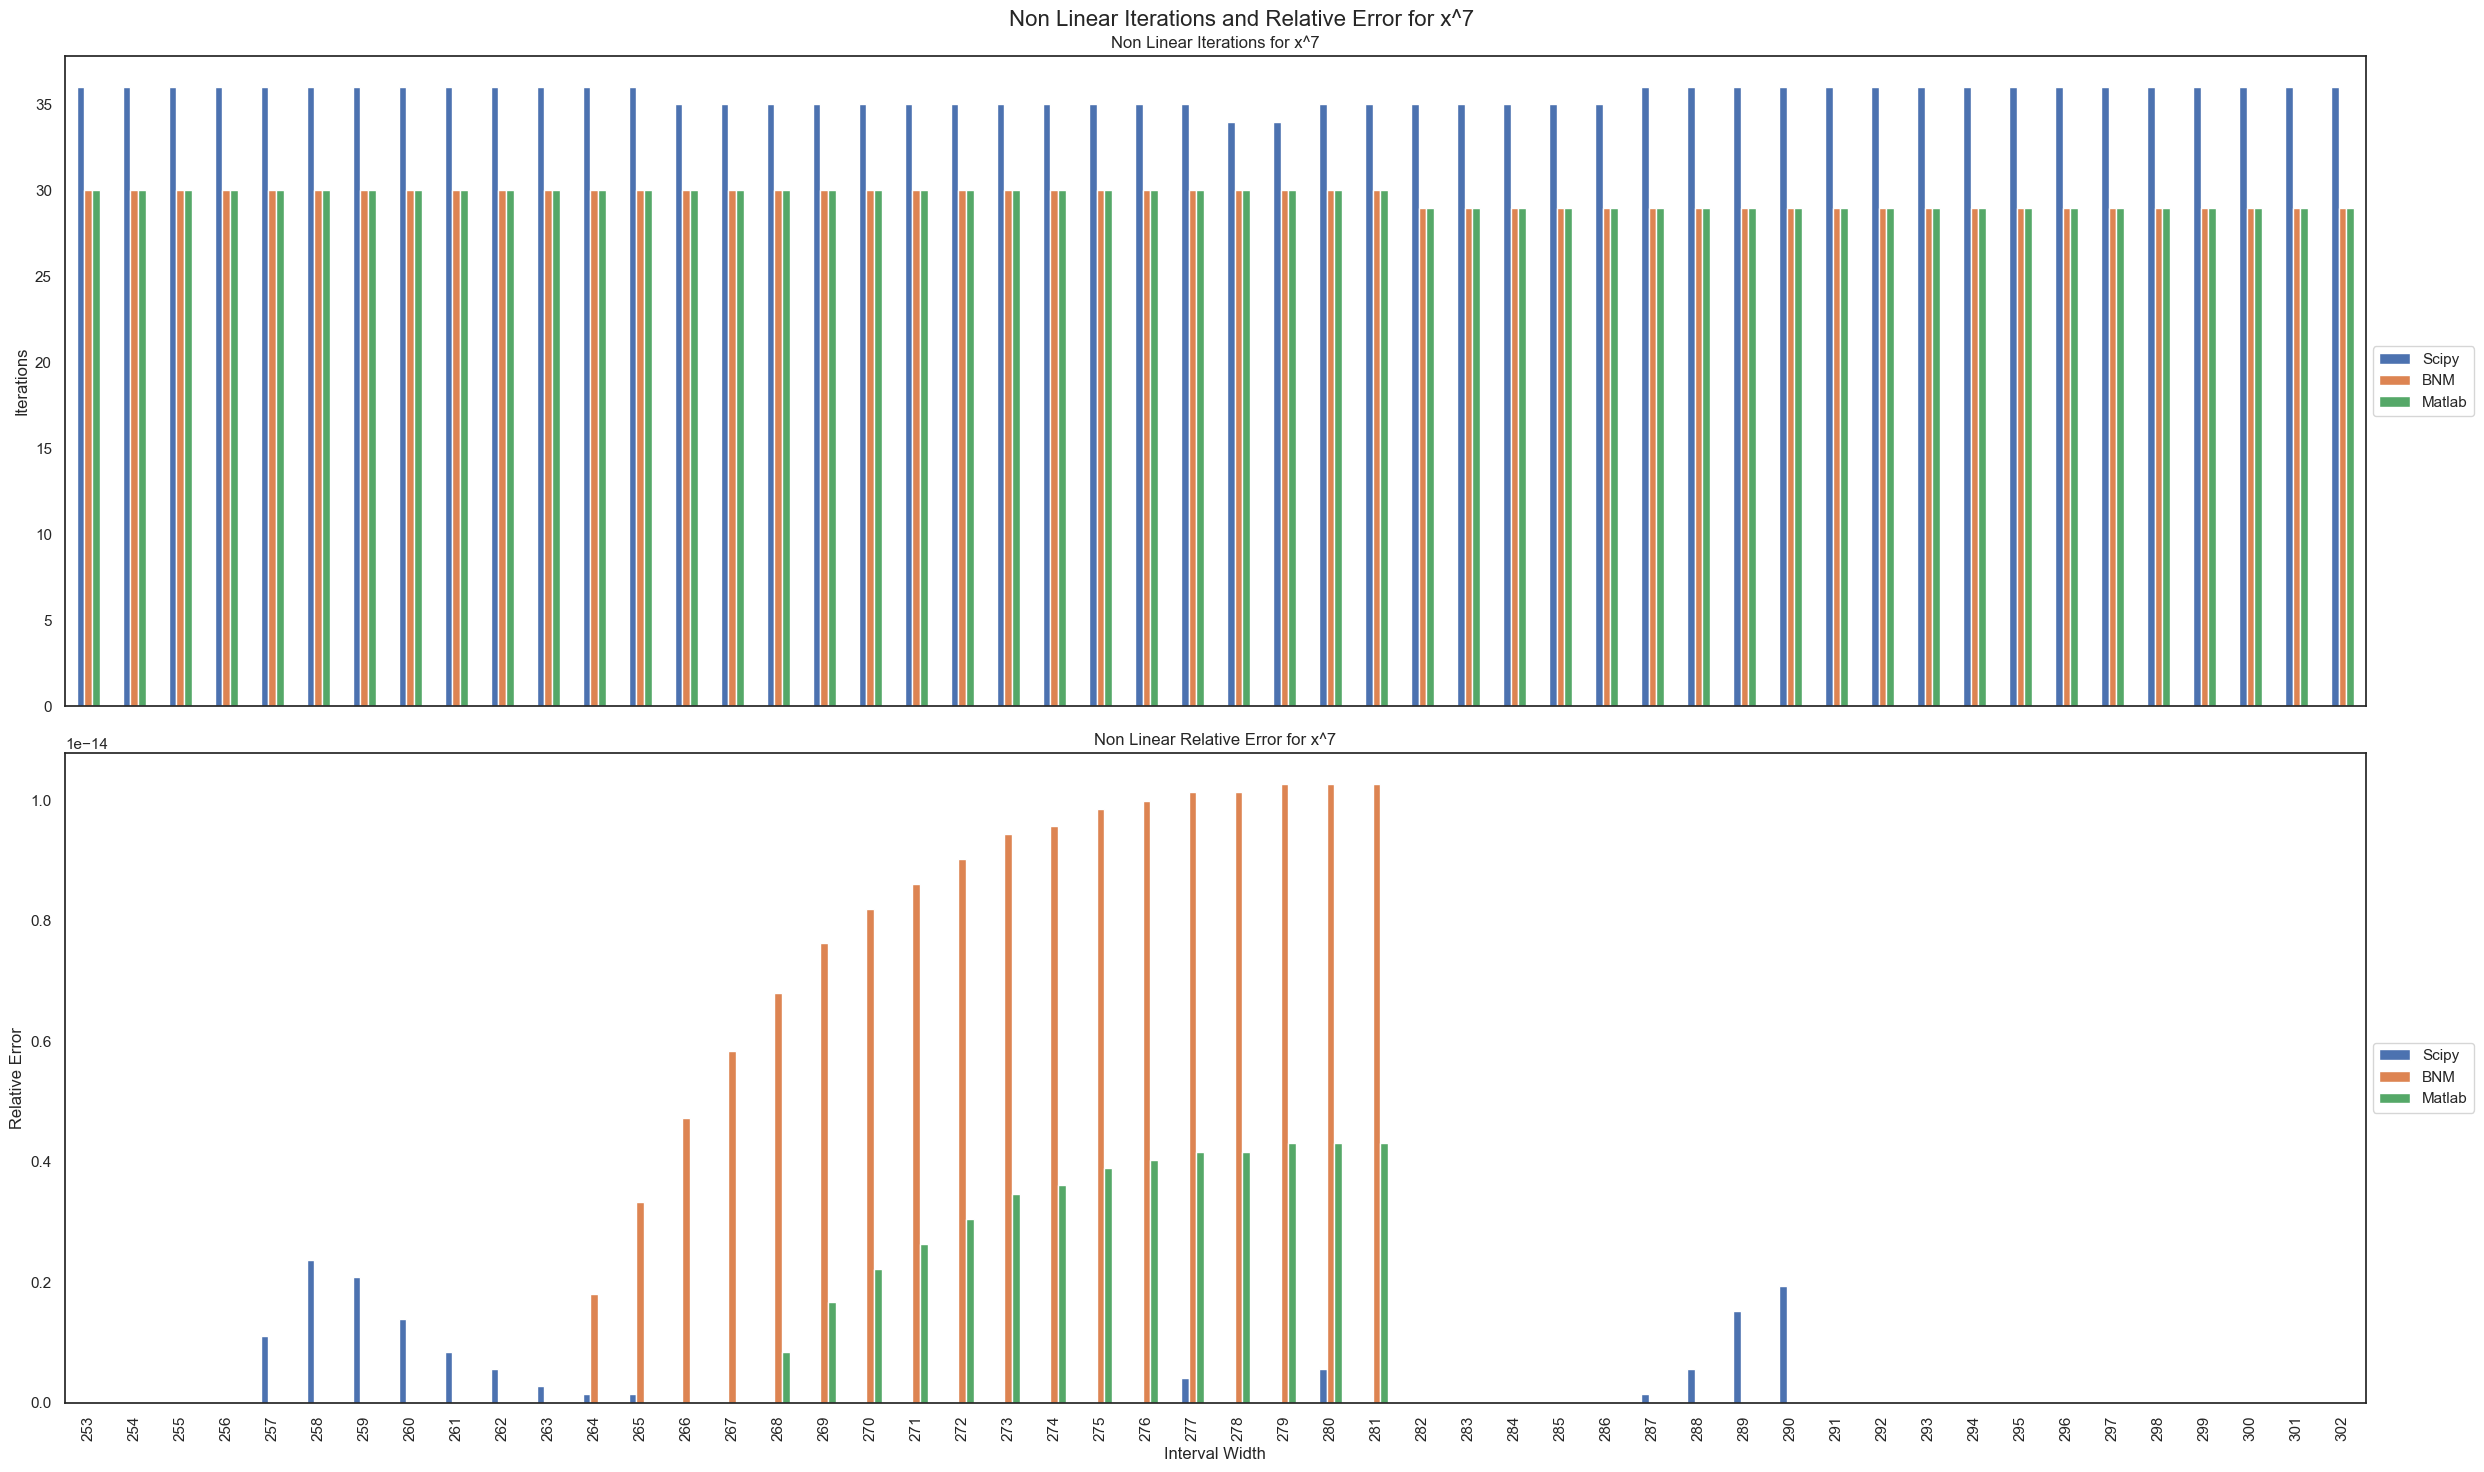

In [85]:
results = json.load(open(f"./Results/NonLinear/NonLinearTimings_{number}.json", "r"))
df = pd.DataFrame(results)
fig = experimentPlot(df, order, length_tuple, number=number, noMatlab=False)
plt.show()

# 2. (Unequal) Comparison between Scipy and BNumMet Brent's method 
Now we compare the performance of the Brent's method implemented in Scipy and BNumMet using different tolerance because as we can see in the previous example, BNumMet's Brent's method is already very fast and accurate but not to the degree of Scipy's Brent's method (which is only by a small margin), therefore we will play incrementing the tolerances of BNumMet's Brent's method and Scipy's by a factor of 10^-1 and compare the results, independently. 

## 2.1 BNumMet Brent's method with smaller tolerance
Our expected result will be that we will achive better results with BNumMet's Brent's method because we will be able to reach the better accuracy while increasing the number of iterations, hopefully still being faster than Scipy's Brent's method. However, between Matlab's Brent's method and BNumMet's Brent's method, we expect to see BNumMet's Brent's method being more accurate than Matlab's Brent's method, however the number of iterations will be higher than Matlab's Brent's method - as we can see in the previous example.

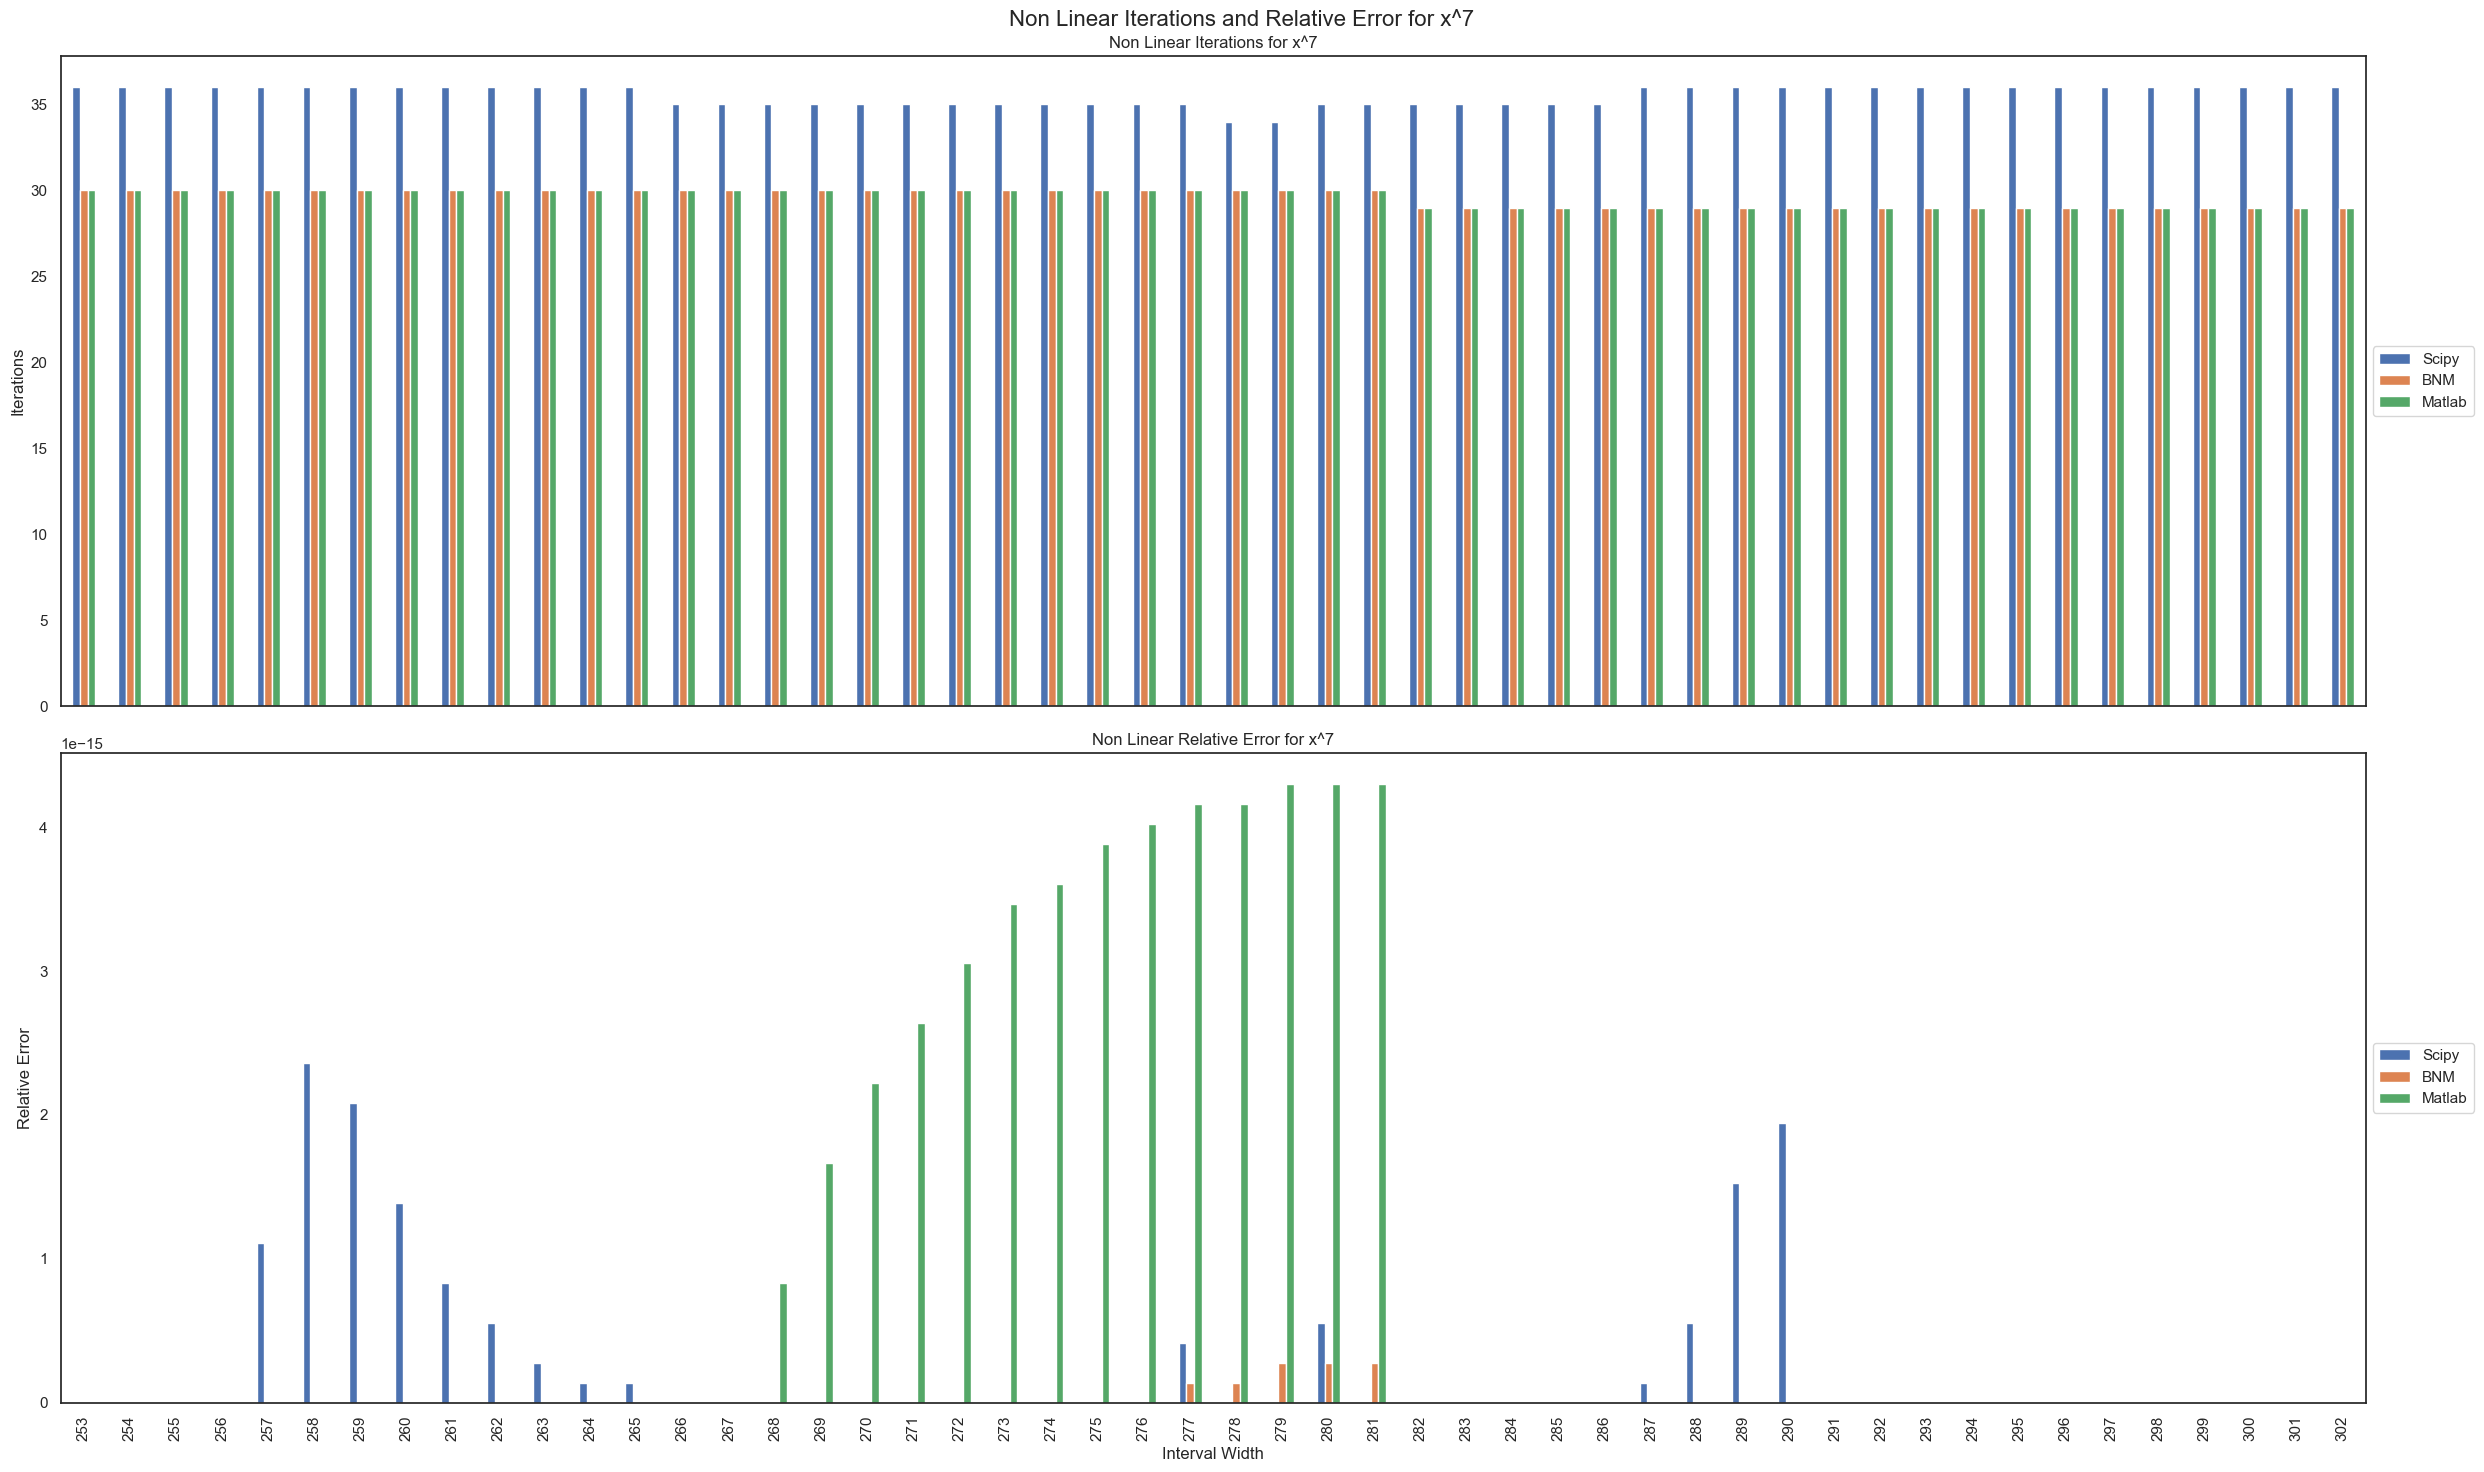

In [87]:
results = json.load(
    open(f"./Results/NonLinear/NonLinearTimings_diffTol_bnm_{number}.json", "r")
)
df = pd.DataFrame(results)
fig = experimentPlot(df, order, length_tuple, number=number, noMatlab=False)
plt.show()

## 2.2 Scipy Brent's method with smaller tolerance

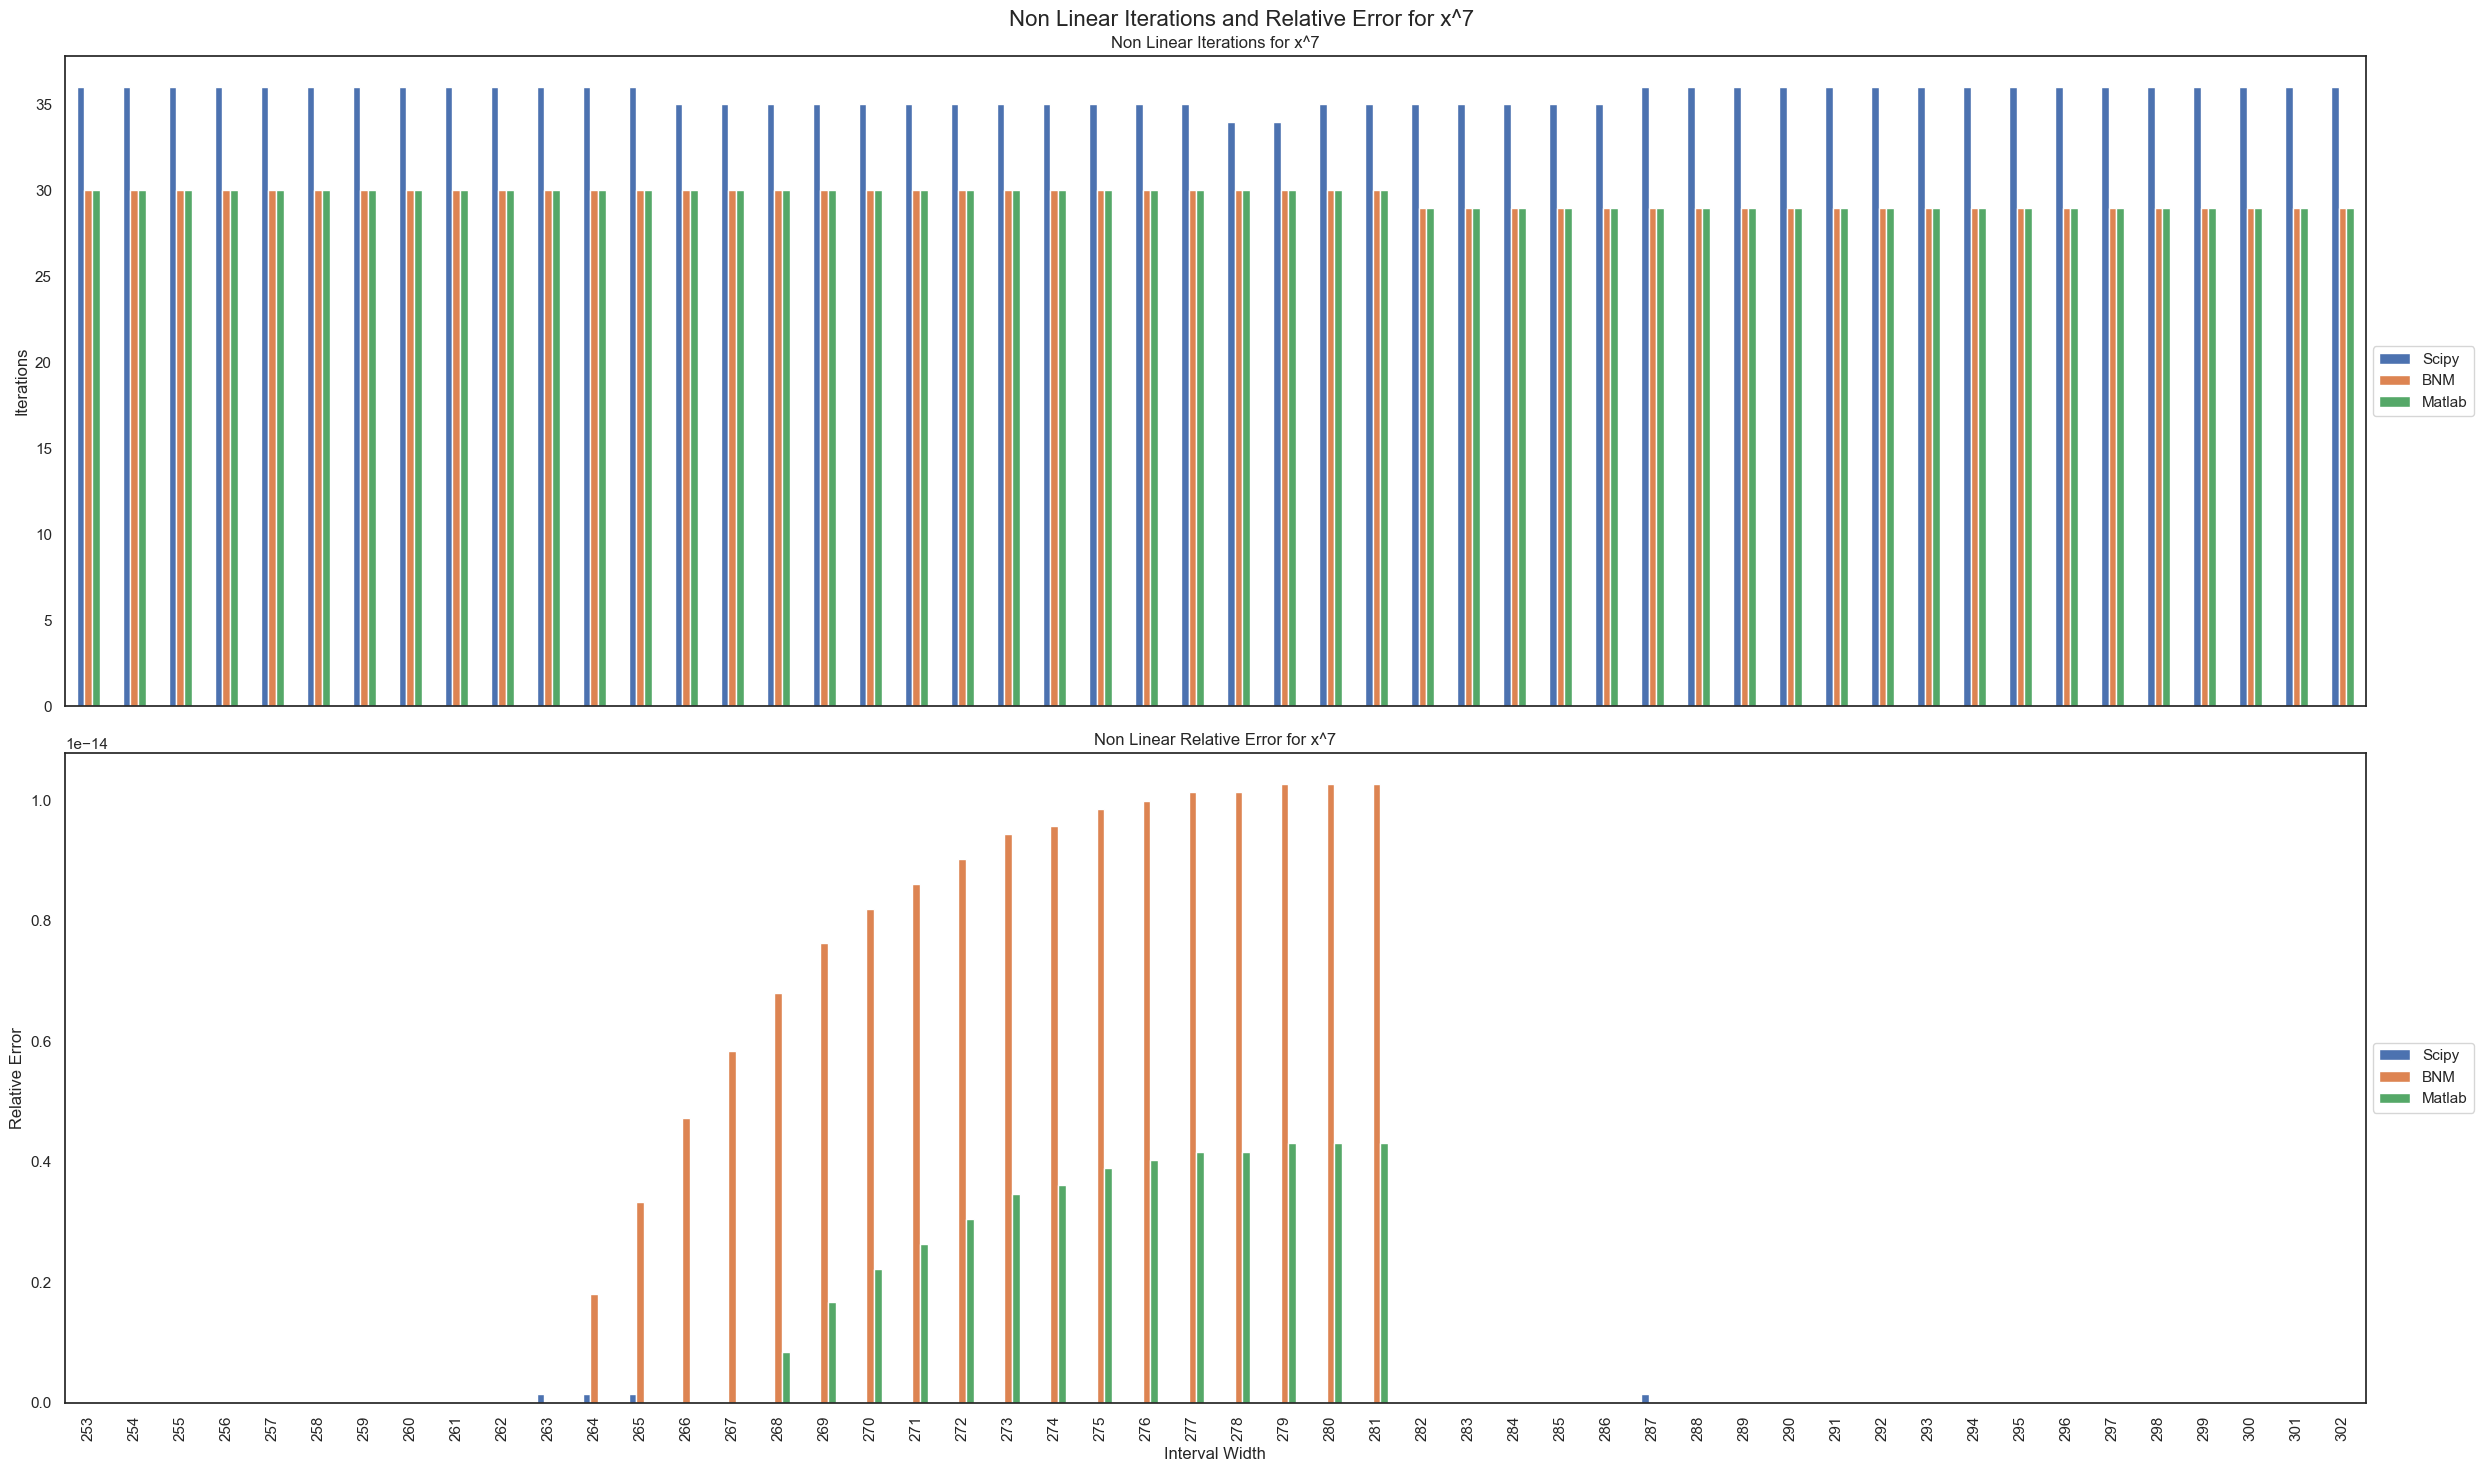

In [88]:
results = json.load(
    open(f"./Results/NonLinear/NonLinearTimings_diffTol_scipy_{number}.json", "r")
)
df = pd.DataFrame(results)
fig = experimentPlot(df, order, length_tuple, number=number, noMatlab=False)
plt.show()